# Audit Data
 Donated on 7/13/2018

## Dataset Information
 The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)



## Data Pre-processing

In [2]:
df_audit_risk= pd.read_csv('audit_risk.csv')
df_audit_risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [5]:
df_audit_risk.shape

(776, 27)

In [13]:
df_audit_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,776.0,20.184536,24.319017,1.85,2.3700,3.8900,55.5700,59.8500
PARA_A,776.0,2.450194,5.678870,0.00,0.2100,0.8750,2.4800,85.0000
Score_A,776.0,0.351289,0.174055,0.20,0.2000,0.2000,0.6000,0.6000
Risk_A,776.0,1.351029,3.440447,0.00,0.0420,0.1750,1.4880,51.0000
PARA_B,776.0,10.799988,50.083624,0.00,0.0000,0.4050,4.1600,1264.6300
Score_B,776.0,0.313144,0.169804,0.20,0.2000,0.2000,0.4000,0.6000
Risk_B,776.0,6.334008,30.072845,0.00,0.0000,0.0810,1.8405,758.7780
TOTAL,776.0,13.218481,51.312829,0.00,0.5375,1.3700,7.7075,1268.9100
numbers,776.0,5.067655,0.264449,5.00,5.0000,5.0000,5.0000,9.0000
Score_B.1,776.0,0.223711,0.080352,0.20,0.2000,0.2000,0.2000,0.6000


In [6]:
df_audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [9]:
df_audit_risk.columns.tolist()

['Sector_score',
 'LOCATION_ID',
 'PARA_A',
 'Score_A',
 'Risk_A',
 'PARA_B',
 'Score_B',
 'Risk_B',
 'TOTAL',
 'numbers',
 'Score_B.1',
 'Risk_C',
 'Money_Value',
 'Score_MV',
 'Risk_D',
 'District_Loss',
 'PROB',
 'RiSk_E',
 'History',
 'Prob',
 'Risk_F',
 'Score',
 'Inherent_Risk',
 'CONTROL_RISK',
 'Detection_Risk',
 'Audit_Risk',
 'Risk']

In [3]:
df_trial= pd.read_csv('trial.csv')
df_trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [7]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [14]:
df_trial.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,776.0,20.184536,24.319017,1.85,2.3700,3.890,55.5700,59.85
PARA_A,776.0,2.450194,5.678870,0.00,0.2100,0.875,2.4800,85.00
SCORE_A,776.0,3.512887,1.740549,2.00,2.0000,2.000,6.0000,6.00
PARA_B,776.0,10.799988,50.083624,0.00,0.0000,0.405,4.1600,1264.63
SCORE_B,776.0,3.131443,1.698042,2.00,2.0000,2.000,4.0000,6.00
TOTAL,776.0,13.218481,51.312829,0.00,0.5375,1.370,7.7075,1268.91
numbers,776.0,5.067655,0.264449,5.00,5.0000,5.000,5.0000,9.00
Marks,776.0,2.237113,0.803517,2.00,2.0000,2.000,2.0000,6.00
Money_Value,775.0,14.137631,66.606519,0.00,0.0000,0.090,5.5950,935.03
MONEY_Marks,776.0,2.909794,1.597452,2.00,2.0000,2.000,4.0000,6.00


In [10]:
df_trial.columns.tolist()

['Sector_score',
 'LOCATION_ID',
 'PARA_A',
 'SCORE_A',
 'PARA_B',
 'SCORE_B',
 'TOTAL',
 'numbers',
 'Marks',
 'Money_Value',
 'MONEY_Marks',
 'District',
 'Loss',
 'LOSS_SCORE',
 'History',
 'History_score',
 'Score',
 'Risk']

Most columns from the 2 dataframes have similar feature names and also similar description. Some columns are in all capital letters, some have values in multiples of 10. The only columns in 'trial' that are entirely differrent are 'Loss' and 'Risk'.

In [19]:
dif_columns = set(df_audit_risk.columns) ^ set(df_trial.columns)
print("diffrent columns:", dif_columns)

diffrent columns: {'CONTROL_RISK', 'SCORE_B', 'Loss', 'Detection_Risk', 'Score_B', 'Risk_F', 'Risk_B', 'PROB', 'Risk_C', 'Score_B.1', 'District', 'MONEY_Marks', 'Marks', 'Audit_Risk', 'Score_A', 'SCORE_A', 'Prob', 'Inherent_Risk', 'History_score', 'Score_MV', 'LOSS_SCORE', 'RiSk_E', 'Risk_D', 'District_Loss', 'Risk_A'}


In [25]:
#Renaming columns
df_trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B',  'TOTAL', 'numbers', 'Marks',
       'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ]

In [24]:
df_trial['Score_A'] = df_trial['Score_A']/10
df_trial['Score_B'] = df_trial['Score_B']/10

## Merging Dataframes

In [16]:
same_columns = np.intersect1d(df_audit_risk.columns,df_trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Risk', 'Score', 'Sector_score', 'TOTAL', 'numbers'], dtype=object)

In [26]:
# Merge two Dataframes  on common columns  using outer join
merged_df = pd.merge(df_audit_risk, df_trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])
merged_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk_trial'],
      dtype='object')

## Data Cleaning

In [28]:
df = merged_df.drop(['Risk_trial'], axis = 1)

we deleted the 'Risk_trial' column which as originally 'Risk' from 'trial.csv' as it had some values that were different from the 'Risk' column from 'audit_risk.csv'.
This condition is being satisfied by the 'Risk' column in 'audit_risk.csv' and not by the 'Risk' column in 'trial.csv'.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    810 non-null    float64
 1   LOCATION_ID     810 non-null    object 
 2   PARA_A          810 non-null    float64
 3   Score_A         810 non-null    float64
 4   Risk_A          810 non-null    float64
 5   PARA_B          810 non-null    float64
 6   Score_B         810 non-null    float64
 7   Risk_B          810 non-null    float64
 8   TOTAL           810 non-null    float64
 9   numbers         810 non-null    float64
 10  Score_B.1       810 non-null    float64
 11  Risk_C          810 non-null    float64
 12  Money_Value     809 non-null    float64
 13  Score_MV        810 non-null    float64
 14  Risk_D          810 non-null    float64
 15  District_Loss   810 non-null    int64  
 16  PROB            810 non-null    float64
 17  RiSk_E          810 non-null    flo

Money_Value has 1 missing value.



In [30]:
#Replacing the missing value by the median of the column
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,810.0,21.406716,24.760476,1.85,2.3700,3.8900,55.5700,59.8500
PARA_A,810.0,2.348556,5.579501,0.00,0.0700,0.8200,2.3975,85.0000
Score_A,810.0,0.344938,0.173042,0.20,0.2000,0.2000,0.6000,0.6000
Risk_A,810.0,1.294561,3.378180,0.00,0.0140,0.1640,1.4385,51.0000
PARA_B,810.0,10.347643,49.067564,0.00,0.0000,0.3350,2.9850,1264.6300
Score_B,810.0,0.308395,0.167741,0.20,0.2000,0.2000,0.4000,0.6000
Risk_B,810.0,6.068334,29.461510,0.00,0.0000,0.0670,1.3470,758.7780
TOTAL,810.0,12.665829,50.292444,0.00,0.4300,1.2900,7.3375,1268.9100
numbers,810.0,5.064815,0.259188,5.00,5.0000,5.0000,5.0000,9.0000
Score_B.1,810.0,0.222716,0.078789,0.20,0.2000,0.2000,0.2000,0.6000


'Detection_Risk' and 'Risk_F' have the same values throughout the columns. Deleting these columns.

In [44]:
df = df.drop(['Detection_Risk', 'Risk_F'], axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 809
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    float64
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   Risk_A         760 non-null    float64
 5   PARA_B         760 non-null    float64
 6   Score_B        760 non-null    float64
 7   Risk_B         760 non-null    float64
 8   TOTAL          760 non-null    float64
 9   numbers        760 non-null    float64
 10  Score_B.1      760 non-null    float64
 11  Risk_C         760 non-null    float64
 12  Money_Value    760 non-null    float64
 13  Score_MV       760 non-null    float64
 14  Risk_D         760 non-null    float64
 15  District_Loss  760 non-null    float64
 16  PROB           760 non-null    float64
 17  RiSk_E         760 non-null    float64
 18  History        

LOCATION_ID has object datatype. However there are numerical values in the column. There must be non-numeric values present.

In [45]:
#Unique values in LOCATION_ID column
df["LOCATION_ID"].unique()

array([23.,  6.,  7.,  8., 13., 37., 24.,  3.,  4., 14.,  5., 20., 19.,
       21., 22.,  9., 11., 12., 29., 30., 38., 31.,  2., 32., 16., 33.,
       15., 36., 34., 18., 25., 39., 27., 35., 40., 41., 42.,  1., 28.,
       43., 44., 17.])

In [46]:
print("These are the number of non-numeric values in LOCATION_ID: ", len(df[(df["LOCATION_ID"] == 'LOHARU') | (df["LOCATION_ID"] ==  'NUH') | (df["LOCATION_ID"] == 'SAFIDON')]))

These are the number of non-numeric values in LOCATION_ID:  0


Deleting the rows with these 3 values as we have no information about the sequencing of the numbers present in the LOCATION_ID column.

In [49]:
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  760


Dropping duplicate values if any. Here the rows which intersected with both dataframes get deleted.

In [50]:
df = df.drop_duplicates(keep = 'first')
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  760


In [51]:
#Number of unique values in each columns
for i in range(0, len(df.columns)):
    print(df.columns[i], ":", df.iloc[:,i].nunique())

Sector_score : 13
LOCATION_ID : 42
PARA_A : 362
Score_A : 3
Risk_A : 362
PARA_B : 358
Score_B : 3
Risk_B : 360
TOTAL : 470
numbers : 5
Score_B.1 : 3
Risk_C : 5
Money_Value : 327
Score_MV : 3
Risk_D : 327
District_Loss : 3
PROB : 3
RiSk_E : 5
History : 7
Prob : 3
Score : 17
Inherent_Risk : 583
CONTROL_RISK : 11
Audit_Risk : 600
Risk : 2
Marks : 3
MONEY_Marks : 3
District : 3
Loss : 3
LOSS_SCORE : 3
History_score : 3


## Correlation Matrix

<Axes: >

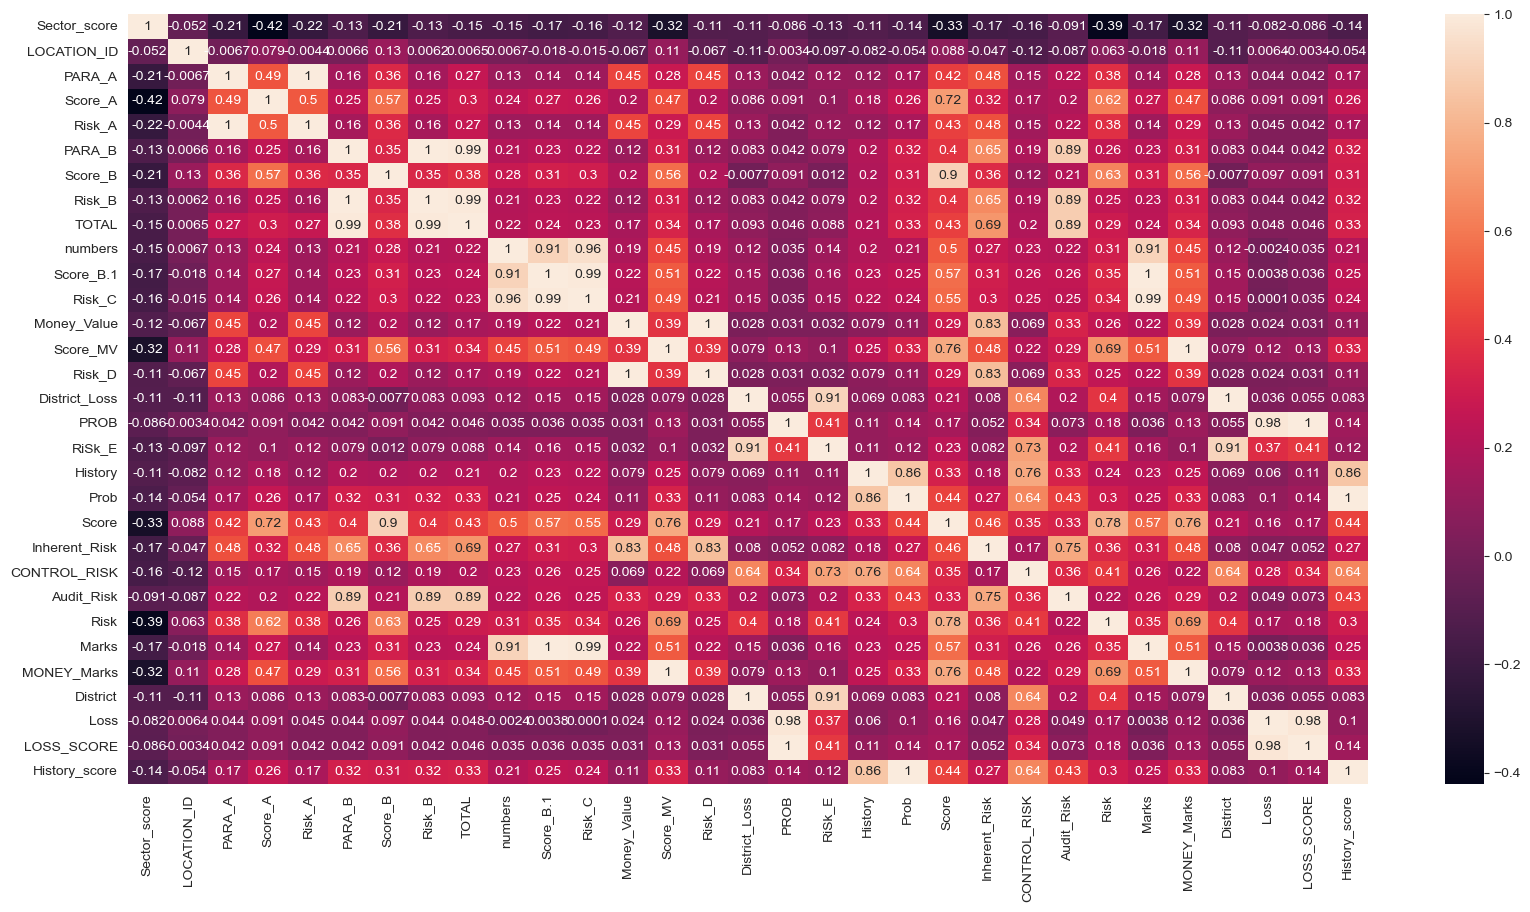

In [52]:
# for all variables 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),  annot=True)

## Classification

In [54]:
#Creating a new dataframe for classification by deleting the Audit_Risk column.
class_df = df.drop("Audit_Risk", axis = 1)

In [55]:
X = class_df.drop(["Risk"], axis = 1)
y = class_df["Risk"]

## Classification: Train-Test Split¶


In [57]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, 
                                                            test_size = 0.25, random_state = 0)

## Classification: Feature Scaling¶


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.

# Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Part 1: Build a classifier based on KNN (K=3 for testing) using Euclidean distance.

You are expected to code the KNN classifier (including the distance function).

Report performance using an appropriate k-fold cross validation using confusion matrices on the given dataset.

Report the run time performance of your above tests.

In [4]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier